---

 ## <font color=red>Project:</font>   
---
<center><h1><font color=green>NYC Taxi Trip Duration: Predictive models </h1></center>


---

---
###  <font color=indigo>Task 1:</font>   
---
## Most suitable evaluation metric: RMSLE

* From EDA of this data, it is clear that it contains large number of outliers. 
* Root Mean Squared Log Error (RMSLE) drastically scales down the outliers, therefore nullifies their effect. 
* This is not possible in case of Root Mean Square  Error (RMSE) which is commonly used metric for regressive problems. In case of RMSE, the presence of outliers can explode the error term to a very high value. 
* Hence, to minimize the effect of outliers, I have used RMSLE as the evaluation metrics.

---

* ### Importing Libraries

In [1]:
# Importing the required libraries 
%matplotlib inline
import numpy as np
import pandas as pd
from datetime import timedelta
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_log_error as msle
from math import sqrt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

* ### Load the data

In [2]:
# Importing Data
df = pd.read_csv("D:/DATASCIENCE/Machine Learning/Linear Models/Resources-NYC Taxi Trip Project/nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [3]:
# Converting strings to datetime features
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)

In [4]:
df['day_of_week'] = df['pickup_datetime'].dt.weekday
df['hour_of_day'] = df['pickup_datetime'].dt.hour

Here, we have  variables dropoff_datetime and store_and_fwd_flag which are not available before the trip starts and hence will not be used as features to the model.

In [5]:
df=df.drop(['id','store_and_fwd_flag','dropoff_datetime'],axis=1)

From EDA of this data, pickup_latitude, passenger_count, trip_duration contains outliers.

* ### Removing Outliers

In [6]:
df = df.loc[(df.pickup_latitude > 40.6) & (df.pickup_latitude < 40.9)]
df = df.loc[(df.dropoff_latitude>40.6) & (df.dropoff_latitude < 40.9)]
df = df.loc[(df.dropoff_longitude > -74.05) & (df.dropoff_longitude < -73.7)]
df = df.loc[(df.pickup_longitude > -74.05) & (df.pickup_longitude < -73.7)]

In [7]:
df = df.loc[~(df['passenger_count'] == 0)]
df = df.loc[~(df['passenger_count'] == 7)]
df = df.loc[~(df['passenger_count'] == 9)]

In [8]:
df = df.loc[(df.trip_duration > 40.6) & (df.trip_duration < 11*3600)]

In [9]:
df.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,hour_of_day
0,2,2016-02-29 16:40:21,1,-73.953918,40.778873,-73.963875,40.771164,400,0,16
1,1,2016-03-11 23:35:37,2,-73.988312,40.731743,-73.994751,40.694931,1100,4,23
2,2,2016-02-21 17:59:33,2,-73.997314,40.721458,-73.948029,40.774918,1635,6,17
3,2,2016-01-05 09:44:31,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,9
4,1,2016-02-17 06:42:23,1,-74.017120,40.708469,-73.988182,40.740631,848,2,6


In [10]:
def time_of_day(x):
    # to calculate what time of it is now
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'

df['pickup_time_of_day'] = df['hour_of_day'].apply(time_of_day)

In [11]:
def passenger(x):
    if x['passenger_count'] < 1:
        val='None'
    elif x['passenger_count'] < 2:
        val= 'single'
    elif x['passenger_count'] < 5:
        val= 'small'
    else:
        val= 'Large'
    return val
df['Passenger_gruop']=df.apply(passenger,axis=1)

In [12]:
# Sampling data
sample_data = df.sample(10000, random_state=1)

In [13]:
# File structure and content
print('We have {} rows.'.format(sample_data.shape[0]))
print('We have {} columns'.format(sample_data.shape[1]))
sample_data.iloc[1,:]

We have 10000 rows.
We have 12 columns


vendor_id                               1
pickup_datetime       2016-06-13 05:14:59
passenger_count                         1
pickup_longitude               -74.014549
pickup_latitude                 40.717999
dropoff_longitude                -73.9804
dropoff_latitude                40.751541
trip_duration                         836
day_of_week                             0
hour_of_day                             5
pickup_time_of_day             Late night
Passenger_gruop                    single
Name: 331951, dtype: object

In [14]:
# Missing Values
sample_data.isnull().sum()

vendor_id             0
pickup_datetime       0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
trip_duration         0
day_of_week           0
hour_of_day           0
pickup_time_of_day    0
Passenger_gruop       0
dtype: int64

---
###  <font color=indigo>Task 2:</font>   
---
# Benchmark Model:


* ### Shuffling and Creating Train and Test Set

In [15]:
# importing the shuffle library 
from sklearn.utils import shuffle

# Shuffling the Dataset
df = shuffle(df, random_state = 42)

# creating 4 divisions
div = int(df.shape[0]/4)

# 3 parts to train set and 1 part to test set
train = df.loc[:3*div+1,:]
test = df.loc[3*div+1:]

In [16]:
train.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,hour_of_day,pickup_time_of_day,Passenger_gruop
180914,1,2016-06-02 06:29:09,1,-73.988068,40.737637,-74.005783,40.745190,246,3,6,Morning,single
291564,2,2016-03-18 17:36:21,1,-73.992188,40.738022,-74.002289,40.735050,200,4,17,Evening,single
589504,2,2016-04-21 05:55:49,5,-74.008499,40.719994,-73.986542,40.722221,507,3,5,Late night,Large
51572,2,2016-04-10 21:01:51,1,-73.969833,40.768692,-73.982384,40.777184,282,6,21,Evening,single
74312,1,2016-03-05 23:38:34,1,-73.993874,40.746735,-73.988106,40.728806,670,5,23,Late night,single


In [17]:
test.head()

,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,hour_of_day,pickup_time_of_day,Passenger_gruop
541735,1,2016-05-27 07:32:16,2,-73.980774,40.748493,-73.987335,40.752846,270,4,7,Morning,small
550742,2,2016-04-21 08:23:18,6,-74.011299,40.702942,-74.011864,40.702850,176,3,8,Morning,Large
542548,1,2016-06-16 09:25:47,1,-73.938393,40.827888,-73.938995,40.834633,994,3,9,Morning,single
681436,1,2016-01-23 13:59:54,1,-73.995995,40.724556,-74.007874,40.705006,945,5,13,Afternoon,single
463193,2,2016-03-01 07:23:41,1,-73.962120,40.767738,-73.987457,40.738251,782,1,7,Morning,single


* ### Simple Mean ( mean of Trip duration)

In [18]:
# storing simple mean in a new column in the test set as "simple_mean"
test['simple_mean'] = train['trip_duration'].mean()

In [19]:
# calculating RMSLE
trip_mean_error = sqrt((msle(test['trip_duration'] , test['simple_mean'])))
trip_mean_error

0.7740223907097

* ### Trip duration with respect to pickup time of day

In [20]:
# trip duration mean with respect to the mean of pickup time of the day
pickup_time = pd.pivot_table(train, values='trip_duration', index = ['pickup_time_of_day'], aggfunc=np.mean)
pickup_time

,trip_duration
pickup_time_of_day,
Afternoon,924.263886
Evening,842.250711
Late night,769.213739
Morning,817.258524


In [21]:
# initializing new column to zero
test['pickup_time'] = 0

# For every unique entry in pickup time of day
for i in train['pickup_time_of_day'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickup_time'][test['pickup_time_of_day'] == str(i)] = train['trip_duration'][train['pickup_time_of_day'] == str(i)].mean()

In [22]:
# calculating RMSLE
pickup_time_error = sqrt(msle(test['trip_duration'] , test['pickup_time'] ))
pickup_time_error

0.7724335000616009

* ### Trip duration with respect to pickup day of week

In [23]:
# trip duration mean with respect to the mean of day of week
pickup_day = pd.pivot_table(train, values='trip_duration', index = ['day_of_week'], aggfunc=np.mean)
pickup_day

,trip_duration
day_of_week,
0,808.703570
1,852.438091
2,879.756417
3,897.621469
4,868.051775
5,776.187620
6,761.084998


In [24]:
# initializing new column to zero
test['pickup_day'] = 0

# For every unique entry in day of week
for i in train['day_of_week'].unique():
  # Assign the mean value corresponding to unique entry
  test['pickup_day'][test['day_of_week'] == str(i)] = train['trip_duration'][train['day_of_week'] == str(i)].mean()

In [25]:
# calculating RMSLE
pickup_day_error = sqrt(msle(test['trip_duration'] , test['day_of_week'] ))
pickup_day_error

5.320308394318112

* ### Trip duration with respect to passenger gruop

In [26]:
# trip duration mean with respect to the mean of Passenger gruop
pass_count = pd.pivot_table(train, values='trip_duration', index = ["Passenger_gruop"], aggfunc=np.mean)
pass_count

,trip_duration
Passenger_gruop,
Large,841.553301
single,824.302559
small,875.231960


In [27]:
# initializing new column to zero
test['pass_count'] = 0

# For every unique entry in passenger count
for i in train['Passenger_gruop'].unique():
  # Assign the mean value corresponding to unique entry
  test['pass_count'][test['Passenger_gruop'] == str(i)] = train['trip_duration'][train['Passenger_gruop'] == str(i)].mean()

In [28]:
# calculating RMSLE
pass_count_error = sqrt(msle(test['trip_duration'] , test['pass_count'] ))
pass_count_error

0.7736291715532779

* ### Trip duration with respect to both day of week and passenger gruop

In [29]:
combo = pd.pivot_table(train, values = 'trip_duration', index = ['pickup_time_of_day', 'Passenger_gruop'], aggfunc = np.mean)
combo

trip_duration
pickup_time_of_day Passenger_gruop               
Afternoon          Large               930.757714
                   single              905.238699
                   small               987.722417
Evening            Large               845.706374
                   single              831.313695
                   small               876.191249
Late night         Large               768.430329
                   single              763.194732
                   small               787.537247
Morning            Large               829.063729
                   single              803.892112
                   small               871.147432

In [30]:
# Initiating new empty column
test['Super_mean'] = 0

# Assigning variables to strings ( to shorten code length)
s2 = 'pickup_time_of_day'
s1 = 'Passenger_gruop'


# For every Unique Value in s1
for i in test[s1].unique():
  # For every Unique Value in s2
  for j in test[s2].unique():
    # Calculate and Assign mean to new column, corresponding to both unique values of s1 and s2 simultaneously
    test['Super_mean'][(test[s1] == i) & (test[s2]==str(j))] = train['trip_duration'][(train[s1] == i) & (train[s2]==str(j))].mean()

In [31]:
#calculating RMSLE
super_mean_error =  sqrt(msle(test['trip_duration'] , test['Super_mean'] ))
super_mean_error

0.7719966332369116

* ### Observations:

    1. The error of simple mean of trip duration hour is 0.7740223907097.
    2. The rmsle of day of week is much high 5.320308394318112.
    3. The error of super mean error of trip duration with respect to both day of week and passenger gruop is 0.7719966332369116
---

---
###  <font color=indigo>Task 3:</font>   
---

# K-Nearest neighbours’ model:
---

In [32]:
data=sample_data.drop(['passenger_count','pickup_datetime','hour_of_day'],axis=1)

In [33]:
data=pd.get_dummies(data, columns=['pickup_time_of_day','vendor_id','Passenger_gruop','day_of_week'])

In [34]:
data

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_time_of_day_Afternoon,pickup_time_of_day_Evening,pickup_time_of_day_Late night,pickup_time_of_day_Morning,vendor_id_1,...,Passenger_gruop_Large,Passenger_gruop_single,Passenger_gruop_small,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
160348,-73.789062,40.642551,-73.980011,40.737331,2592,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
331951,-74.014549,40.717999,-73.980400,40.751541,836,0,0,1,0,1,...,0,1,0,1,0,0,0,0,0,0
644059,-73.972404,40.750896,-73.956749,40.775097,634,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0
485833,-73.985931,40.762550,-73.970093,40.791500,505,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
458082,-73.951248,40.782440,-73.951691,40.792034,333,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623242,-73.981461,40.755650,-74.005920,40.711689,930,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
611988,-73.991150,40.733311,-73.998665,40.732239,215,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
539063,-73.966850,40.753345,-73.790344,40.646866,1925,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
189950,-74.012321,40.701401,-73.983582,40.718578,727,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


* ### Segregating variables: Independent and Dependent Variables

In [35]:
#seperating independent and dependent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']
x.shape, y.shape

((10000, 20), (10000,))

* ### Scaling the data (Using MinMax Scaler)

In [36]:
#scaling the data(using MinMax Scaler)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
x = pd.DataFrame(x_scaled)

In [38]:
train_x,test_x,train_y,test_y = train_test_split(x,y, random_state = 56)

* ### Implementing KNN Regressor

In [39]:
#importing knn regressor
from sklearn.neighbors import KNeighborsRegressor as KNN

In [40]:
#creating instance of KNN
reg = KNN(n_neighbors = 10)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating RMSLE
test_predict = reg.predict(test_x)
k = sqrt(msle(test_predict, test_y))
print('Test RMSLE    ', k )

Test RMSLE     0.626800033313334


* ### Elbow for Regressor

In [41]:
def Elbow(K):
  #initiating empty list
    test_rmsle = []
  
  #training model for evey value of K
    for i in K:
        #Instance of KNN
        reg = KNN(n_neighbors = i)
        reg.fit(train_x, train_y)
        #Appending mse value to empty list claculated using the predictions
        tmp = reg.predict(test_x)
        tmp = sqrt(msle(tmp,test_y))
        test_rmsle.append(tmp)
    
    return test_rmsle

In [42]:
#Defining K range
k = range(50,250)

In [43]:
# calling above defined function
test = Elbow(k)

Text(0.5, 1.0, 'Elbow Curve for test')

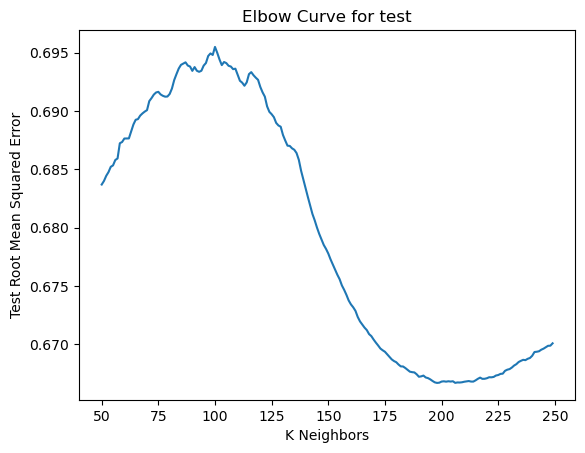

In [44]:
#plotting the curves
plt.plot(k, test)
plt.xlabel('K Neighbors')
plt.ylabel('Test Root Mean Squared Error')
plt.title('Elbow Curve for test')

In [45]:
#creating instance of KNN
reg = KNN(n_neighbors = 198)

# Fitting the model
reg.fit(train_x, train_y)

# Predicting over the Train Set and calculating F1
test_predict = reg.predict(test_x)
k = sqrt(msle(test_predict, test_y))
print('Test RMSLE    ', k )

Test RMSLE     0.6667072638786745


In [46]:
knn_train_score = reg.score(train_x,train_y)

In [47]:
knn_test_score = reg.score(test_x,test_y)

* ### Observations: 
    1. From elbow curve it is observed that Test RMSLE is minimum at k = 198.
    2.The Test RMSLE is 0.6667072638786745 when value of k as 198.
    3.Therefore, the best value of k is 198.
---

---
###  <font color=indigo>Task 4:</font>   
---
# Linear Regression Model:


In [48]:
custom_data=sample_data.drop(['passenger_count','pickup_datetime','hour_of_day'],axis=1)

In [49]:
custom_data=pd.get_dummies(custom_data, columns=['pickup_time_of_day','vendor_id','Passenger_gruop','day_of_week'])

In [50]:
custom_data.columns

Index(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'pickup_time_of_day_Afternoon',
       'pickup_time_of_day_Evening', 'pickup_time_of_day_Late night',
       'pickup_time_of_day_Morning', 'vendor_id_1', 'vendor_id_2',
       'Passenger_gruop_Large', 'Passenger_gruop_single',
       'Passenger_gruop_small', 'day_of_week_0', 'day_of_week_1',
       'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5',
       'day_of_week_6'],
      dtype='object')

* ### Segregating variables: Independent and Dependent Variables

In [51]:
#seperating independent and dependent variables
x=custom_data.drop(['trip_duration'],axis=1)
y=custom_data['trip_duration']

* ### Splitting the data into train set and the test set

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25, random_state=56)

In [53]:
x_train.shape, y_train.shape,x_test.shape,y_test.shape

((7500, 20), (7500,), (2500, 20), (2500,))

* ### Implementing Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
# Creating instance of Linear Regresssion
model=LinearRegression(normalize = True)

# Fitting the model
model.fit(x_train,y_train)

LinearRegression(normalize=True)

In [55]:
#predicting the train values and finding the RMSLE
train_predict = abs(model.predict(x_train))
k = sqrt(msle(train_predict, y_train))
print('Train Root Mean Squared Log Error     ', k )

Train Root Mean Squared Log Error      0.7148384210867376


In [56]:
#predicting the test values and finding the RMSLE
test_predict = abs(model.predict(x_test))
k = sqrt(msle(test_predict, y_test))
print('Test Root Mean Squared Log Error     ', k )

Test Root Mean Squared Log Error      0.7012489804725315


* ### Parameters of Linear Regression

In [57]:
#computing the coefficients of above model
model.coef_

array([ 5.67340710e+03, -4.51142611e+03,  4.52021754e+03, -2.90287132e+03,
       -1.19088581e+16, -1.19088581e+16, -1.19088581e+16, -1.19088581e+16,
       -2.16319583e+14, -2.16319583e+14,  1.52603107e+16,  1.52603107e+16,
        1.52603107e+16,  1.37830132e+16,  1.37830132e+16,  1.37830132e+16,
        1.37830132e+16,  1.37830132e+16,  1.37830132e+16,  1.37830132e+16])

Text(0.5, 1.0, 'Coefficient plot')

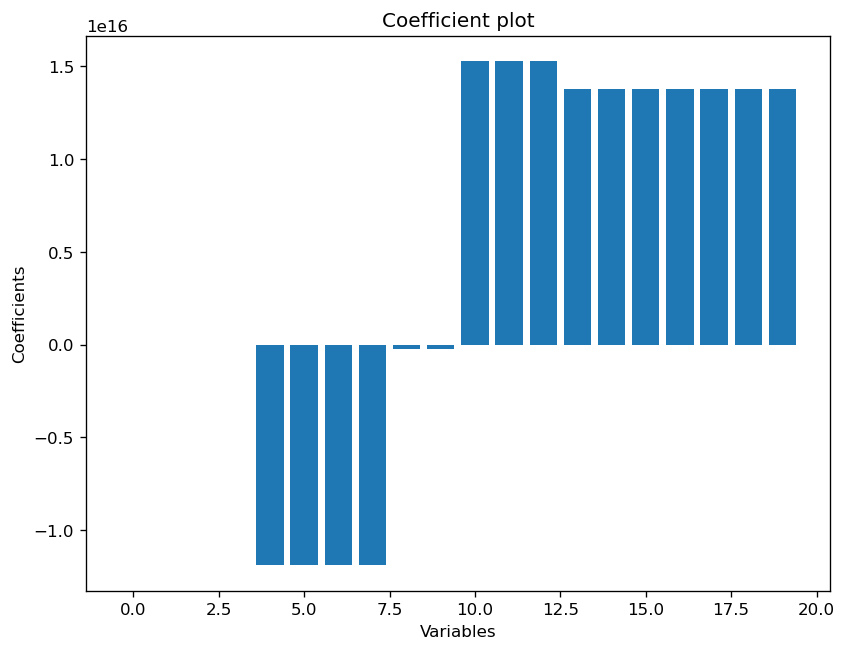

In [58]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(x_train.columns))
y = model.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

* ### Variable coefficients Graph Observations:
    1. The sign of a linear regression coefficient tells that where there is positive or negative correlation between each independent variable and the dependent variable. 
    2. A positive coefficient indicates that as the value of independent variable increases, mean of dependent variable also tends to increase.
    3. A negative coefficient indicates that as the value of independent variable increases, mean of dependent variable also tends to decrease.
    4. From above graph it is observed that model does not depends upon Independent variables largely. 

* ### Checking assumptions of Linear Model

In [59]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' : test_predict,
})

residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
509598,649,958.0,-309.0
257554,805,748.0,57.0
471057,799,816.0,-17.0
607900,700,766.0,-66.0
589875,912,494.0,418.0


* ### Checking Distribution of Residuals

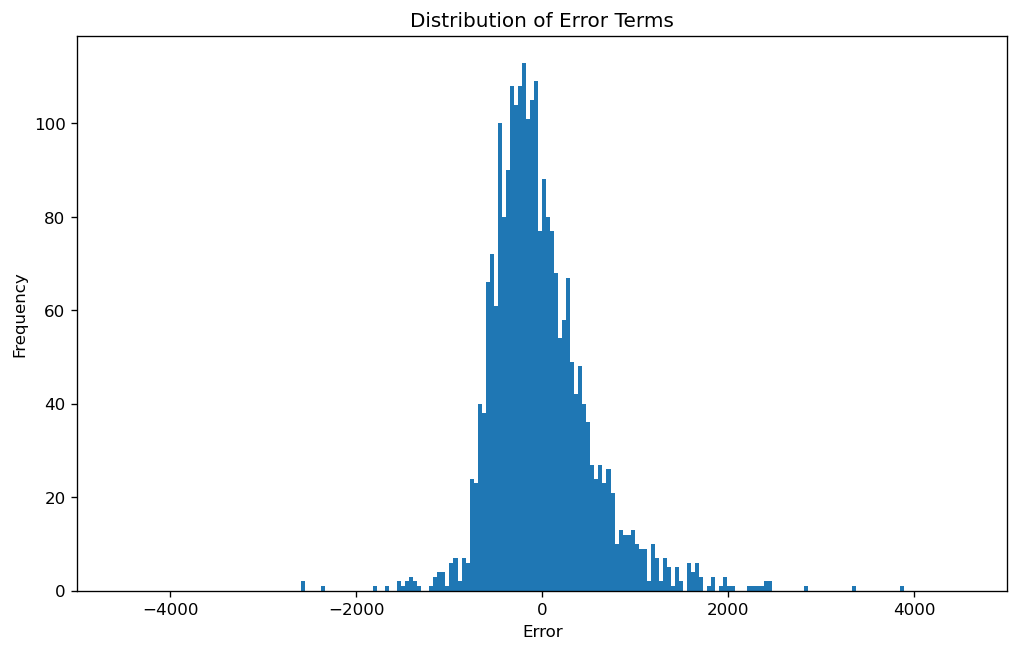

In [60]:
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlim(-5000,5000)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

According to the Histogram, the distribution of error is nearly normal, But there are some outliers on the Higher end of the errors.

* ### QQ-Plot (Is the data Normally Distributed?)

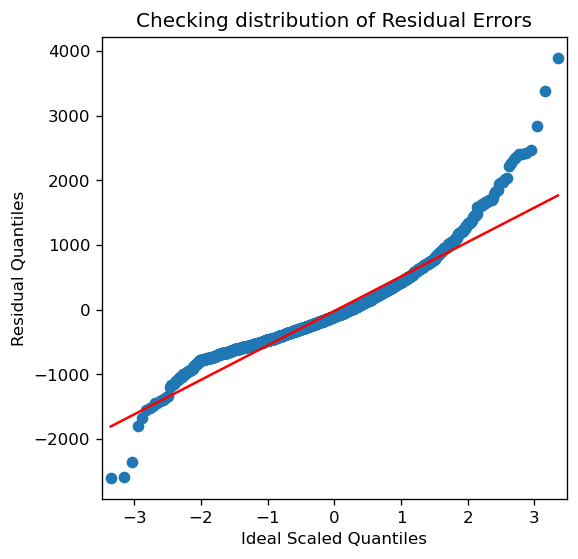

In [61]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

The QQ-plot clearly verifies our findings from the the histogram of the residuals, the data is mostly normal in nature, but there sre some outliers on the higher as well as lower end of the Residues.

In [62]:
linear_train_score = model.score(x_train,y_train)

In [63]:
linear_test_score = model.score(x_test,y_test)

* ### Observations: 

    1. The training rmsle is 0.7148384210867376 and testing rmsle is 0.7012489804725315
    2. data is mostly normal in nature, but there sre some outliers on the higher end of the Residues.
---

---
###  <font color=indigo>Task 5:</font>   
---
# decision Tree Regression:


In [64]:
clean_data= sample_data

In [65]:
clean_data=clean_data.drop(['pickup_time_of_day','pickup_datetime', 'Passenger_gruop'],axis=1)

In [66]:
clean_data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,day_of_week,hour_of_day
160348,2,5,-73.789062,40.642551,-73.980011,40.737331,2592,1,16
331951,1,1,-74.014549,40.717999,-73.980400,40.751541,836,0,5
644059,1,1,-73.972404,40.750896,-73.956749,40.775097,634,2,21
485833,2,1,-73.985931,40.762550,-73.970093,40.791500,505,5,22
458082,1,1,-73.951248,40.782440,-73.951691,40.792034,333,1,8


* ### Segregating variables: Independent and Dependent Variables

In [67]:
#seperating independent and dependent variables
X = clean_data.drop(["trip_duration"],axis = 1)
Y =clean_data["trip_duration"]

* ### Splitting the data into train set and the test set

In [68]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=56)

In [69]:
X_train.shape, Y_train.shape,X_test.shape,Y_test.shape

((7500, 8), (7500,), (2500, 8), (2500,))

* ### Implementing Decision Tree Regressor

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
# Creating instance of Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=0)

# Fitting the model
regressor.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=0)

In [72]:
#predicting the train values and finding the RMSLE
train_predict = regressor.predict(X_train)
k = sqrt(msle(train_predict,Y_train))
print("training rmsle ",k)

training rmsle  0.0


In [73]:
#predicting the test values and finding the RMSLE
test_predict = regressor.predict(X_test)
k = sqrt(msle(test_predict,Y_test))
print("testing rmsle ",k)

testing rmsle  0.622662391104586


* ### interpretion of the variable importance

<AxesSubplot:>

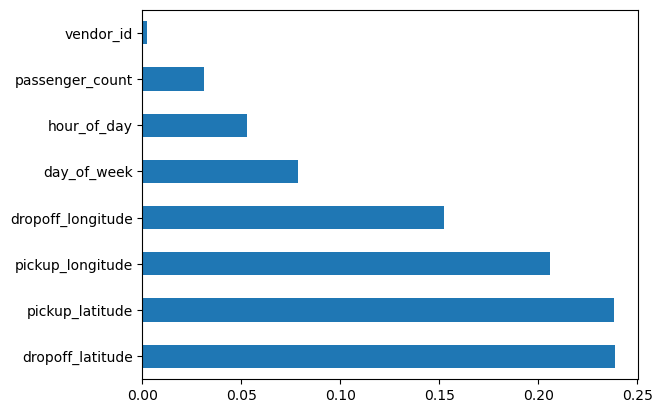

In [74]:
feature_importance= pd.Series(regressor.feature_importances_, index= X.columns)
feature_importance.nlargest(20).plot(kind='barh')

From the above graph we can conclude that the varaible "dropoff_latitude" and "pickup_latitude" has more impact on the trip duration variable than other variables.

In [75]:
decision_train_score = regressor.score(X_train,Y_train)

In [76]:
decision_test_score = regressor.score(X_test,Y_test)

* ### Observations: 
    1. The training RMSLE of decision model is 0.0 where as the testing RMSLE is  0.622662391104586.
    2. Varaible "dropoff_latitude" and "pickup_latitude" has more impact on the trip duration variable while "vendor_id has least impact on trip duration.
---

---
###  <font color=indigo>Task 6:</font>   
---
# BAR plot:


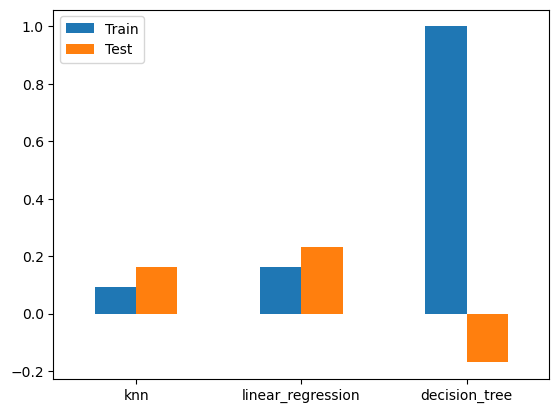

In [77]:
Train = [knn_train_score, linear_train_score, decision_train_score]
Test = [knn_test_score, linear_test_score, decision_test_score]
index= ['knn','linear_regression','decision_tree']
d= pd.DataFrame({'Train': Train, 'Test': Test}, index=index)
ax = d.plot.bar(rot=0)

From above graph it is observed that test score for KNN as well as Linear Regression is slightly higher than train score, while there is much difference between test and train scores in case of decision Tree Model.